## Appendix 1 - Python Code and Outputs

### Data Preparation

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Import Training Data

In [2]:
import numpy as np
import pandas as pd
# load training data
digit_training_data = pd.read_csv('train.csv')

# show first rows of the data
digit_training_data.head(100)
# show number of columns and rows
digit_training_data.shape

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(42000, 785)

### Investigation of Missing Data and Outliers in Training Data

In [3]:
# find null counts, percentage of null values, and column type
null_count = digit_training_data.isnull().sum()
null_percentage = digit_training_data.isnull().sum() * 100 / len(digit_training_data)
column_type = digit_training_data.dtypes

# show null counts, percentage of null values, and column type for columns with more than one Null value
null_summary = pd.concat([null_count, null_percentage, column_type], axis=1, keys=['Missing Count', 'Percentage Missing','Column Type'])
null_summary_only_missing = null_summary[null_count != 0].sort_values('Percentage Missing',ascending=False)
null_summary_only_missing

,Missing Count,Percentage Missing,Column Type


The above analysis displays that there is no missing data in the digit recognizer training dataset.

### Import Testing Data

In [4]:
# import test dataset
digit_testing_data = pd.read_csv('test.csv')

# show first ten rows of the data
digit_testing_data.head(10)
# show number of columns and rows
digit_testing_data.shape

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(28000, 784)

### Investigation of Missing Data and Outliers in Training Data

In [5]:
# find null counts, percentage of null values, and column type
null_count = digit_testing_data.isnull().sum()
null_percentage = digit_testing_data.isnull().sum() * 100 / len(digit_training_data)
column_type = digit_testing_data.dtypes

# show null counts, percentage of null values, and column type for columns with more than one Null value
null_summary = pd.concat([null_count, null_percentage, column_type], axis=1, keys=['Missing Count', 'Percentage Missing','Column Type'])
null_summary_only_missing = null_summary[null_count != 0].sort_values('Percentage Missing',ascending=False)
null_summary_only_missing

,Missing Count,Percentage Missing,Column Type


The above analysis displays that there is no missing data in the digit recognizer test dataset.

### Apply Principal Components Analysis (PCA) to Combined Training and Test Data

First, we will combine the training and test dataframes

In [6]:
# Create a copy of the training dataframe
pca_train_df = digit_training_data.copy(deep=True)

# Drop the label column from the copy of the training dataframe
pca_train_df.drop(['label'], axis=1, inplace=True)

# Concatenate the training and test dataframes
pca_df = pd.concat([pca_train_df, digit_testing_data])

# show first rows of the data
pca_df.head(10)
# show number of columns and rows
pca_df.shape
# Describe the dataframe
pca_df.describe()


# find null counts, percentage of null values, and column type
null_count = pca_df.isnull().sum()
null_percentage = pca_df.isnull().sum() * 100 / len(digit_training_data)
column_type = pca_df.dtypes

# show null counts, percentage of null values, and column type for columns with more than one Null value
null_summary = pd.concat([null_count, null_percentage, column_type], axis=1, keys=['Missing Count', 'Percentage Missing','Column Type'])
null_summary_only_missing = null_summary[null_count != 0].sort_values('Percentage Missing',ascending=False)
null_summary_only_missing


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(70000, 784)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


,Missing Count,Percentage Missing,Column Type


Next, we scale the data to prepare it for our principal components analysis

In [7]:
# Scale PCA dataframe's data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
pca_scaled = sc.fit_transform(pca_df) # normalizing the features

# Convert scaled data from numpy array into dataframe
pca_features = list(pca_df.columns.values)
pca_scaled_df = pd.DataFrame(pca_scaled, columns=pca_features)

# Confirm scaling transformation was a success
pca_scaled_df.shape
pca_scaled_df.head(10)
pca_scaled_df.describe()


(70000, 784)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032951,-0.023387,-0.01675,-0.010638,-0.008339,-0.005342,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032951,-0.023387,-0.01675,-0.010638,-0.008339,-0.005342,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032951,-0.023387,-0.01675,-0.010638,-0.008339,-0.005342,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032951,-0.023387,-0.01675,-0.010638,-0.008339,-0.005342,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032951,-0.023387,-0.01675,-0.010638,-0.008339,-0.005342,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032951,-0.023387,-0.01675,-0.010638,-0.008339,-0.005342,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032951,-0.023387,-0.01675,-0.010638,-0.008339,-0.005342,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032951,-0.023387,-0.01675,-0.010638,-0.008339,-0.005342,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032951,-0.023387,-0.01675,-0.010638,-0.008339,-0.005342,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032951,-0.023387,-0.01675,-0.010638,-0.008339,-0.005342,0.0,0.0,0.0,0.0


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.308440e-18,2.233134e-18,-2.436147e-18,1.015061e-18,4.060244e-19,2.283887e-18,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.295091e-02,-2.338733e-02,-1.675050e-02,-1.063784e-02,-8.339086e-03,-5.342334e-03,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.295091e-02,-2.338733e-02,-1.675050e-02,-1.063784e-02,-8.339086e-03,-5.342334e-03,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.295091e-02,-2.338733e-02,-1.675050e-02,-1.063784e-02,-8.339086e-03,-5.342334e-03,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.295091e-02,-2.338733e-02,-1.675050e-02,-1.063784e-02,-8.339086e-03,-5.342334e-03,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.236282e+01,5.965323e+01,9.086908e+01,1.619808e+02,1.634635e+02,1.932091e+02,0.0,0.0,0.0,0.0


We also apply this scaling to our test dataframe for later use as we progress through the construction of our Principal Component Analysis and Random Forest model creation processes.

In [8]:
# Apply the standard scaling to the test dataframe
pca_test_scaled = sc.transform(digit_testing_data)

# Convert scaled data from numpy array into dataframe
pca_test_features = list(digit_testing_data.columns.values)
pca_test_scaled_df = pd.DataFrame(pca_test_scaled, columns=pca_test_features)

# Confirm scaling transformation was a success
pca_test_scaled_df.shape
pca_test_scaled_df.head(10)
pca_test_scaled_df.describe()

(28000, 784)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032951,-0.023387,-0.01675,-0.010638,-0.008339,-0.005342,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032951,-0.023387,-0.01675,-0.010638,-0.008339,-0.005342,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032951,-0.023387,-0.01675,-0.010638,-0.008339,-0.005342,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032951,-0.023387,-0.01675,-0.010638,-0.008339,-0.005342,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032951,-0.023387,-0.01675,-0.010638,-0.008339,-0.005342,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032951,-0.023387,-0.01675,-0.010638,-0.008339,-0.005342,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032951,-0.023387,-0.01675,-0.010638,-0.008339,-0.005342,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032951,-0.023387,-0.01675,-0.010638,-0.008339,-0.005342,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032951,-0.023387,-0.01675,-0.010638,-0.008339,-0.005342,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032951,-0.023387,-0.01675,-0.010638,-0.008339,-0.005342,0.0,0.0,0.0,0.0


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,2.800000e+04,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.005476,-0.006186,-0.006679,-0.003435,-0.004133,-5.342334e-03,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.913561,0.849760,0.651505,0.771675,0.519683,5.143547e-16,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032951,-0.023387,-0.016750,-0.010638,-0.008339,-5.342334e-03,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032951,-0.023387,-0.016750,-0.010638,-0.008339,-5.342334e-03,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032951,-0.023387,-0.016750,-0.010638,-0.008339,-5.342334e-03,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032951,-0.023387,-0.016750,-0.010638,-0.008339,-5.342334e-03,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,42.195907,59.653231,69.315126,119.722186,76.578856,-5.342334e-03,0.0,0.0,0.0,0.0


Next, we will conduct a Principal Components Analysis to identify principal components that account for at least 95% of the variation in the data.

Text(0.5, 1.0, 'Cumulative Scree Plot')

Text(0.5, 0, 'Principal Component')

Text(0, 0.5, 'Cumulative Variance Explained')

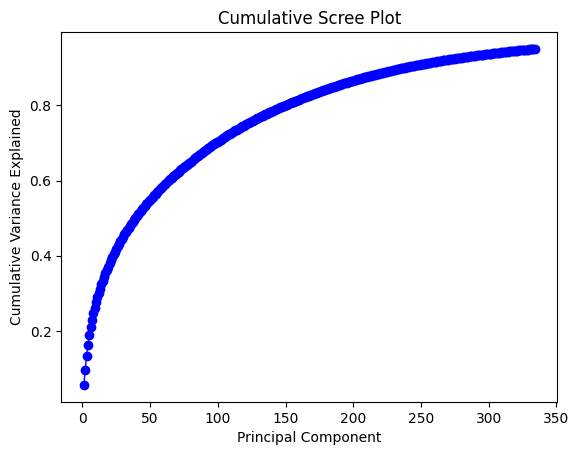

,Principal Component,Variance Explained
0,1,0.056427
1,2,0.096839
2,3,0.134222
3,4,0.163152
4,5,0.188360
...,...,...
329,330,0.948843
330,331,0.949180
331,332,0.949515
332,333,0.949848


,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_325,PC_326,PC_327,PC_328,PC_329,PC_330,PC_331,PC_332,PC_333,PC_334
0,-5.230192,-4.904646,4.175498,-0.753746,4.991252,1.873491,4.739370,-4.818814,0.209226,-1.457392,...,-0.294930,-0.331140,-0.024423,-0.024926,0.045890,-0.003012,-0.147771,0.410275,-0.021544,0.366821
1,19.376064,5.924937,1.124527,-2.236678,3.154725,-1.899992,-3.861523,0.291863,-4.064207,-4.372353,...,-0.128982,-0.124511,0.672676,0.511937,-0.540125,0.529084,0.819989,0.384526,-0.180550,-0.530941
2,-7.675868,-1.518335,2.369636,2.392773,4.809067,-4.330499,-0.993471,1.809950,0.311141,0.019186,...,-0.165404,-0.057293,0.202279,-0.102255,-0.366567,-0.008170,0.312031,0.025658,0.306936,0.039762
3,-0.360917,5.988875,1.676212,4.312827,2.388172,2.129843,4.456385,-0.344041,0.783532,5.446840,...,-0.069498,0.613611,-0.176752,1.000874,-1.087020,-0.638053,-1.091480,-0.572388,-1.229735,-0.038666
4,26.628547,5.805648,0.833779,-2.676026,9.565533,-2.676311,-6.303765,-1.579776,-4.078544,-5.843392,...,-0.273326,0.549960,0.300951,0.515609,-0.275421,0.080455,0.749265,-0.507067,-0.408518,-0.037494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,-1.099783,8.956724,-2.928516,-0.816439,-5.882169,-0.554970,2.339101,-4.793652,-2.050955,0.071534,...,0.239650,-0.108552,0.187059,-0.037523,0.177031,-0.043356,-0.282159,-0.071887,-0.217946,0.132786
69996,-3.590883,9.075696,-5.882224,0.284067,2.110737,-3.145613,7.328235,3.542143,-3.870924,-1.293863,...,-0.426408,-0.789908,-0.483165,-0.512408,-1.089110,0.679183,0.039583,-0.525659,-0.276648,-0.449509
69997,-2.978092,1.570972,5.616925,-9.443330,-0.177769,-2.517486,-1.220313,0.480684,-2.481774,1.325569,...,-0.464036,-0.092297,-0.271668,0.287094,0.416254,-0.037262,-0.176553,-0.131879,0.069127,0.527239
69998,-3.978432,2.909071,-3.836933,-1.475158,-6.942173,-2.689870,1.417715,-0.608694,2.042616,-0.161259,...,-0.095967,-0.253895,-0.179321,-0.388641,0.250480,-0.156805,0.472696,-0.217891,0.094942,0.181251


The total run time for the Principal Components Analysis was 0:00:09.623161.


In [9]:
# Start a timer for the Principal Components Analysis
import datetime
pca_start = datetime.datetime.now()

# Applying PCA function on training and testing set of X component
from sklearn.decomposition import PCA
pca_digits_train_test = PCA(n_components=334)
principal_components_digits = pca_digits_train_test.fit_transform(pca_scaled_df)


# Create a Cumulative Scree plot to help us determine how many principal components to include in our random forest model
import matplotlib.pyplot as plt
import numpy as np

PC_values = np.arange(pca_digits_train_test.n_components_) + 1
cumulative_explained_variance_pca = np.cumsum(pca_digits_train_test.explained_variance_ratio_)

plt.plot(PC_values, cumulative_explained_variance_pca, 'o-', linewidth=1, color='blue')
plt.title('Cumulative Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Variance Explained')
plt.show()

# Create a dataframe to display the information in the cumulative scree plot in a different manner
scree_df = pd.DataFrame({'Principal Component':PC_values, 'Variance Explained':cumulative_explained_variance_pca})
scree_df

# Create a dataframe that contains the principal component values for each of the observations in the pca dataframe
pca_column_list = []
for num in range(1, 335):
    pca_column_list.append("PC_" + str(num))

pca_digits_df = pd.DataFrame(data = principal_components_digits , columns = pca_column_list )

pca_digits_df


# Print the run time for Python to complete the Principal Components Analysis
pca_end = datetime.datetime.now()
pca_runtime = pca_end - pca_start
print(f"The total run time for the Principal Components Analysis was {pca_runtime}.")

### Construct a Random Forest Model Using the Principal Components Identified

Let's fit a Random Forest Model to predict digits using the principal components just identified.  We will use our training and validation datasets to conduct hyperparameter tuning to find the best hyperparameters for random forest modeling.

In [10]:
# Start a timer for the Random Forest

pca_rf_start = datetime.datetime.now()

# Create the Random Forest Model

# Import Required Modules
#pip install graphviz
#import pandas as pd
#import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

# Split the training dataset into predictor and outcome components
rf_train_validation_x = pca_digits_df.copy(deep=True)
rf_train_validation_x.drop(rf_train_validation_x.tail(28000).index, inplace = True)
rf_train_validation_y = digit_training_data['label']

# Split the Kaggle training data into training and validation components
rf_x_train, rf_x_validation, rf_y_train, rf_y_validation = train_test_split(rf_train_validation_x,
                                                                      rf_train_validation_y, 
                                                                            test_size=0.2, 
                                                                           random_state = 1)

# Conduct hyperparameter tuning for random forest models
param_dist = {'n_estimators': randint(10,100),
              'max_depth': randint(1,100),
             'max_features': randint(1,20)}

rf = RandomForestClassifier()

rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

rand_search.fit(rf_x_train, rf_y_train)

# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

# Print the run time for Python to complete the Random Forest
pca_rf_end = datetime.datetime.now()
pca_rf_runtime = pca_rf_end - pca_rf_start
print(f"The total run time for the Random Forest Model using the principal components was {pca_rf_runtime}.")


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000020C5D3851F0>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000020C5D383550>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000020C46033C70>})

Best hyperparameters: {'max_depth': 93, 'max_features': 18, 'n_estimators': 86}
The total run time for the Random Forest Model using the principal components was 0:21:55.462810.


Next, we will assess the strength of the random forest model associated with the optimal hyperparameters by applying the model to the validation dataset and observing the resulting confusion matrix and accuracy.

Accuracy: 0.9285714285714286


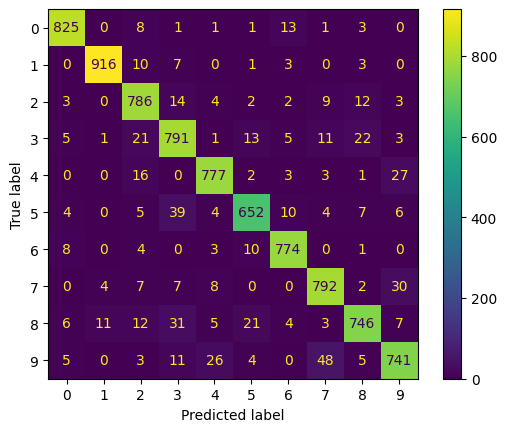

In [11]:

# Generate predictions with the best model
y_validation_predictions_rf = best_rf.predict(rf_x_validation)

# Create the confusion matrix associated with the best random forest model
cm = confusion_matrix(rf_y_validation, y_validation_predictions_rf)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

# Calculate the accuracy, precision, and recall associated with the predictions of the best random forest model

accuracy_rf_validation = accuracy_score(rf_y_validation, y_validation_predictions_rf)
#precision_rf_validation = precision_score(rf_y_validation, y_validation_predictions_rf)
#recall_rf_validation = recall_score(rf_y_validation, y_validation_predictions_rf)

print("Accuracy:", accuracy_rf_validation)
#print("Precision:", precision_rf_validation)
#print("Recall:", recall_rf_validation)


Apply the Random Forest Model to the Test Dataframe

In [ ]:
# Create a dataframe for predictor variables in the test dataframe for random forest model
#rf_testing_x = rf_testing_df.drop(columns=['PassengerId'])
rf_testing_x = pca_digits_df.copy(deep=True)
rf_testing_x.drop(rf_testing_x.head(42000).index, inplace = True)

# Apply the Random Forest model to the test dataset
y_test_predictions_rf = best_rf.predict(rf_testing_x)

# Put the random forest predictions into a Pandas dataframe
prediction_df_rf = pd.DataFrame(y_test_predictions_rf, columns=['Label'])

# Add the ID column to the front of the random forest predictions dataframe
ImageId_series = pd.Series(range(1,28001))
prediction_df_rf.insert(0, 'ImageId', ImageId_series)

#output predictions to csv
#prediction_df_rf.to_csv('test_predictions_pca_random_forest_v1.csv', index=False)


Let's display the Kaggle results from the application of the random forest model using principal components to the test dataset

In [ ]:
# Display the kaggle results associated with the Random Forest Model
plt.figure(figsize = (15, 15))
kaggle_results = plt.imread('Digit_PCA_Random_Forest_Kaggle_Results_v1.jpg')
plt.imshow(kaggle_results)
plt.axis("off")
plt.show()

### Construct a Random Forest Model Using the Principal Components Identified and the Original Data

Let's fit a Random Forest Model to predict digits using the principal components and the original underlying data.  We will use our training and validation datasets to conduct hyperparameter tuning to find the best hyperparameters for random forest modeling.

In [ ]:
# Start a timer for the Random Forest

pca_rf_v2_start = datetime.datetime.now()



# Split the training dataset into predictor and outcome components
rf_train_validation_x = pca_digits_df.copy(deep=True)
rf_train_validation_x.drop(rf_train_validation_x.tail(28000).index, inplace = True)
rf_train_validation_x = pd.concat([rf_train_validation_x, pca_train_df], axis=1)
rf_train_validation_y = digit_training_data['label']

# Split the Kaggle training data into training and validation components
rf_x_train, rf_x_validation, rf_y_train, rf_y_validation = train_test_split(rf_train_validation_x,
                                                                      rf_train_validation_y, 
                                                                            test_size=0.2, 
                                                                           random_state = 1)

# Conduct hyperparameter tuning for random forest models
param_dist = {'n_estimators': randint(10,100),
              'max_depth': randint(1,100),
             'max_features': randint(1,20)}

rf = RandomForestClassifier()

rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

rand_search.fit(rf_x_train, rf_y_train)

# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)


# Print the run time for Python to complete the Random Forest
pca_rf_v2_end = datetime.datetime.now()
pca_rf_v2_runtime = pca_rf_v2_end - pca_rf_v2_start
print(f"The total run time for the Random Forest Model using the principal components and original pixel features was {pca_rf_v2_runtime}.")


Next, we will assess the strength of the random forest model associated with the optimal hyperparameters by applying the model to the validation dataset and observing the resulting confusion matrix and accuracy.

In [ ]:
# Generate predictions with the best model
y_validation_predictions_rf = best_rf.predict(rf_x_validation)

# Create the confusion matrix associated with the best random forest model
cm = confusion_matrix(rf_y_validation, y_validation_predictions_rf)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

# Calculate the accuracy, precision, and recall associated with the predictions of the best random forest model

accuracy_rf_validation = accuracy_score(rf_y_validation, y_validation_predictions_rf)
#precision_rf_validation = precision_score(rf_y_validation, y_validation_predictions_rf)
#recall_rf_validation = recall_score(rf_y_validation, y_validation_predictions_rf)

print("Accuracy:", accuracy_rf_validation)
#print("Precision:", precision_rf_validation)
#print("Recall:", recall_rf_validation)

Apply the Random Forest Model to the Test Dataframe

In [ ]:
# Create a dataframe for predictor variables in the test dataframe for random forest model
rf_testing_x = pca_digits_df.copy(deep=True)
rf_testing_x.drop(rf_testing_x.head(42000).index, inplace = True)
rf_testing_x.reset_index(drop=True, inplace=True)
digit_testing_data.reset_index(drop=True, inplace=True)
rf_testing_x = pd.concat([rf_testing_x, digit_testing_data], axis=1)

# Apply the Random Forest model to the test dataset
y_test_predictions_rf = best_rf.predict(rf_testing_x)

# Put the random forest predictions into a Pandas dataframe
prediction_df_rf = pd.DataFrame(y_test_predictions_rf, columns=['Label'])

# Add the ID column to the front of the random forest predictions dataframe
ImageId_series = pd.Series(range(1,28001))
prediction_df_rf.insert(0, 'ImageId', ImageId_series)

#output predictions to csv
#prediction_df_rf.to_csv('test_predictions_pca_random_forest_v2.csv', index=False)

Let's display the Kaggle results from the application of the random forest model using principal components and the original underlying data features to the test dataset.

In [ ]:
# Display the kaggle results associated with the Random Forest Model
plt.figure(figsize = (15, 15))
kaggle_results = plt.imread('Digit_PCA_And_Original_Features_Random_Forest_Kaggle_Results_v1.jpg')
plt.imshow(kaggle_results)
plt.axis("off")
plt.show()

In [ ]:
# mitigate design flaw
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sc = StandardScaler()
train = digit_training_data.drop(columns = 'label')
train_label = digit_training_data['label']
scaled_train = sc.fit_transform(train)

pca = PCA(n_components=334)
pca_train = pca.fit_transform(scaled_train)

# Split the Kaggle training data into training and validation components
rf_x_train, rf_x_validation, rf_y_train, rf_y_validation = train_test_split(pca_train, train_label, test_size=0.2, random_state = 1)

rf = RandomForestClassifier()
rf.fit(rf_x_train, rf_y_train)
predictions = rf.predict(rf_x_validation)

### Deploy K-Means Clustering

Let's use K-means clustering to predict digits using original features. First let's create our training and testing data and plot the digits in the dataset

In [ ]:
import sys
import sklearn
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Split the training dataset into predictor and outcome variables
kmeans_x_train = digit_training_data.copy(deep=True)
kmeans_x_train.drop(['label'], axis=1, inplace=True)
kmeans_y_train = digit_training_data['label']


kmeans_x_train = np.array(kmeans_x_train)
kmeans_y_train = np.array(kmeans_y_train)


print('Training Data: {}'.format(kmeans_x_train.shape))
print('Training Labels: {}'.format(kmeans_y_train.shape))

# reshape array to 3-dimensional array so we can plot the numbers
kmeans_x_train_plot = kmeans_x_train.reshape(42000, 28, 28)

# Plot the digits in the dataset
fig, axs = plt.subplots(3, 3, figsize = (12, 12))
plt.gray()

for i, ax in enumerate(axs.flat):
    ax.matshow(kmeans_x_train_plot[i])
    ax.axis('off')
    ax.set_title('Number {}'.format(kmeans_y_train[i]))
    fig.show()


Normalize the training data before applying k-means clustering

In [ ]:
from sklearn import preprocessing
kmeans_x_train_norm = preprocessing.normalize(kmeans_x_train)

The MNIST dataset contains images of the integers 0 to 9. Because of this, let’s start by setting the number of clusters to 10, one for each digit

Compute the silhouette coefficients kmeans models with different numbers of clusters. This can vary between –1 and +1. A coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters, while a coefficient close to 0 means that it is close to a cluster boundary; finally, a coefficient close to –1 means that the instance may have been assigned to the wrong cluster.

reference: Geron, Aurelien. (2019). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems. 2nd ed. Sebastopol, CA: O'Reilly.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.cluster import MiniBatchKMeans
# minibatchkmeans has a memory leak warning that we can ignore
import warnings
warnings.filterwarnings('ignore')

# create k-means models with K clusters. 
K = clusters=[10,16,36,64,144,256,400] # test listed cluster numbers

# Store within-cluster-sum of squares and silhouette scores for clusters
wss = []
sil_score = []

# loop though cluster values and save inertia and silhouttee values
for i in K:
    kmeans=MiniBatchKMeans(n_clusters=i, random_state=1)
    kmeans=kmeans.fit(kmeans_x_train_norm)
    # within-cluster-sum-squares
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)
    # silhouttee score
    score = silhouette_score(kmeans_x_train_norm, kmeans.labels_)
    sil_score.append(score)
    print ("Silhouette score for k(clusters) = "+str(i)+" is "+str(score))

In [ ]:
import seaborn as sns
# elbow and silhouttee scores in dataframe with number of clusters
cluster_sil_scores = pd.DataFrame({'Clusters' : K, 'WSS' : wss, 'Sil Score' : sil_score})
cluster_sil_scores

# plot the elbow scores
sns.lineplot(x = 'Clusters', y = 'WSS', data = cluster_sil_scores, marker="+")

Based on the elbow plot, the inertia drops very quickly as we increase k up to 50, but then it decreases a bit more slowly as we keep increasing k. This curve has a distinct elbow shape, we also a more gradual decline around 250.

This indicates that 144 and 256 could be optimal cluster numbers.

In [ ]:
# plot the silhouttee scores
sns.lineplot(x = 'Clusters', y = 'Sil Score', data = cluster_sil_scores, marker="+")

Based on the plot, silhouette scores decline as the number of clusters increases. Scores close to 0 suggest that the clusters are overlapping, and the model with more clusters may not able to distinguish them well.

This isn't what we observe with the inertia plot, so we will still test models with 144 and 256 clusters. We also know there are 10 digits that are represented in the dataset so this could also be an optimal cluster number. We will build three models using  these cluster numbers and compare performance metrics.

K-means clustering is an unsupervised machine learning method so the labels assigned by our KMeans algorithm refer to the cluster each array was assigned to, not the actual target integer. This section defines functions that predict which integer corresponds to each cluster. reference: https://medium.datadriveninvestor.com/k-means-clustering-for-imagery-analysis-56c9976f16b6#:~:text=Preprocessing

In [ ]:
def infer_cluster_labels(kmeans, actual_labels):
    inferred_labels = {}

    for i in range(kmeans.n_clusters):

        # find index of points in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)

        # append actual labels for each point in cluster
        labels.append(actual_labels[index])

        # determine most common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))

        # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels:
            # append the new number to the existing array at this slot
            inferred_labels[np.argmax(counts)].append(i)
        else:
            # create a new array in this slot
            inferred_labels[np.argmax(counts)] = [i]

        #print(labels)
        #print('Cluster: {}, label: {}'.format(i, np.argmax(counts)))

    return inferred_labels

def infer_data_labels(X_labels, cluster_labels):
  # empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)

    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key

    return predicted_labels

Let's build models with 10, 144, and 256 clusters based on our knowledge of the data and the elbow and silhouette plot analysis.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

########### Initialize KMeans model with 10 clusters ##############
# Initialize KMeans model
kmeans = MiniBatchKMeans(n_clusters = 10, random_state=1)

# Fit the model to the training data
kmeans.fit(kmeans_x_train_norm)

# Predict the cluster assignment
X_clusters = kmeans.predict(kmeans_x_train_norm)
print(X_clusters[:20])

# predict labels for kmeans model with 10 clusters
cluster_labels=infer_cluster_labels(kmeans,kmeans_y_train)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)

# print first 20 predicted labels and actual y-values
print(predicted_labels[:20])
print(kmeans_y_train[:20])

# Create the confusion matrix
cm = confusion_matrix(kmeans_y_train, predicted_labels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

# Calculate the accuracy, inertia, and homogeneity scores
accuracy_kmeans = accuracy_score(kmeans_y_train, predicted_labels)
inertia_kmeans = kmeans.inertia_
homogeneity_kmeans = metrics.homogeneity_score(kmeans_y_train,predicted_labels)
print("Accuracy of K=10:", accuracy_kmeans)
print("Inertia of K=10:", inertia_kmeans)
print("Homogeneity of K=10:", homogeneity_kmeans)

########### Initialize KMeans model with 144 clusters ##############
kmeans = MiniBatchKMeans(n_clusters = 144, random_state=1)

# Fit the model to the training data
kmeans.fit(kmeans_x_train_norm)

# Predict the cluster assignment
X_clusters = kmeans.predict(kmeans_x_train_norm)
print(X_clusters[:20])

# predict labels for kmeans model with 144 clusters
cluster_labels=infer_cluster_labels(kmeans,kmeans_y_train)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)

# print first 20 predicted labels and actual y-values
print(predicted_labels[:20])
print(kmeans_y_train[:20])

# Create the confusion matrix
cm = confusion_matrix(kmeans_y_train, predicted_labels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

# Calculate the accuracy scores
accuracy_kmeans = accuracy_score(kmeans_y_train, predicted_labels)
inertia_kmeans = kmeans.inertia_
homogeneity_kmeans = metrics.homogeneity_score(kmeans_y_train,predicted_labels)
print("Accuracy of K=144:", accuracy_kmeans)
print("Inertia of K=144:", inertia_kmeans)
print("Homogeneity of K=144:", homogeneity_kmeans)


########### Initialize KMeans model with 256 clusters ##############
# Initialize KMeans model
kmeans = MiniBatchKMeans(n_clusters = 256, random_state=1)

# Fit the model to the training data
kmeans.fit(kmeans_x_train_norm)

# Predict the cluster assignment
X_clusters = kmeans.predict(kmeans_x_train_norm)
print(X_clusters[:20])

# predict labels for kmeans model with 256 clusters
cluster_labels = infer_cluster_labels(kmeans,kmeans_y_train)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)

# print first 20 predicted labels and actual y-values
print(predicted_labels[:20])
print(kmeans_y_train[:20])

# Create the confusion matrix
cm = confusion_matrix(kmeans_y_train, predicted_labels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

# Calculate the accuracy scores
accuracy_kmeans = accuracy_score(kmeans_y_train, predicted_labels)
inertia_kmeans = kmeans.inertia_
homogeneity_kmeans = metrics.homogeneity_score(kmeans_y_train,predicted_labels)
print("Accuracy of K=256:", accuracy_kmeans)
print("Inertia of K=256:", inertia_kmeans)
print("Homogeneity of K=256:", homogeneity_kmeans)

We observe accuracy scores of 
 - 0.594 for the k-means model with 10 clusters 
 - 0.881 for the k-means model with 144 clusters
 - 0.921 for the k-means model with 256 clusters.

Visualizing Cluster Centroids

Let's display the most representative image for each cluster.

In [ ]:
# Initialize KMeans model with 256 clusters
kmeans = MiniBatchKMeans(n_clusters = 256, random_state=1)

# Fit the model to the training data
kmeans.fit(kmeans_x_train_norm)

# record centroid values
centroids = kmeans.cluster_centers_

# reshape centroids into images
images = centroids.reshape(256, 28, 28)
images *= 255
images = images.astype(np.uint8)

# determine cluster labels
cluster_labels = infer_cluster_labels(kmeans, kmeans_y_train)

# create figure with subplots using matplotlib.pyplot
fig, axs = plt.subplots(32, 8, figsize = (20, 20))
plt.gray();

# loop through subplots and add centroid images
for i, ax in enumerate(axs.flat):
    
    # determine inferred label using cluster_labels dictionary
    for key, value in cluster_labels.items():
        if i in value:
            ax.set_title('Inferred Label:{}'.format(key), fontsize=8)
    
    # add image to subplot
    ax.matshow(images[i]);
    ax.axis('off');
    
# display the figure
fig.show();


Apply the K-means Clustering Model to the Test Dataframe

In [ ]:
# Create a dataframe for predictor variables in the test dataframe for kmeans model
kmeans_testing_x = digit_testing_data.copy(deep=True)
#kmeans_testing_x.drop(['Label'], axis=1, inplace=True)

# Apply the kmeans model to the test dataset
y_test_prediction_clusters_kmeans = kmeans.predict(kmeans_testing_x)

# predict labels for kmeans model
kmeans_predictions = infer_data_labels(y_test_prediction_clusters_kmeans, cluster_labels)

# Put the kmeans predictions into a Pandas dataframe
prediction_df_kmeans = pd.DataFrame(kmeans_predictions, columns=['Label'])

# Add the ID column to the front of the kmeans predictions dataframe
ImageId_series = pd.Series(range(1,28001))
prediction_df_kmeans.insert(0, 'ImageId', ImageId_series)

# Output predictions to csv
#prediction_df_kmeans.to_csv('test_predictions_kmeans_v1.csv', index=False)


Let's display the Kaggle results from the application of the kmeans model on the test dataset

In [ ]:
# Display the kaggle results associated with the Random Forest Model
plt.figure(figsize = (15, 15))
kaggle_results = plt.imread('Digit_Kmeans_v1.jpg')
plt.imshow(kaggle_results)
plt.axis("off")
plt.show()